# Assignment #2: CNN classifier for MNIST dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

## Preprocess data

In [4]:
def scale_mnist_data(train_images, test_images):
    return (train_images / 255, test_images / 255)


scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

# Add dummy channel dimension
scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

## Build model

In [6]:
def get_model(input_shape):
    return Sequential([
        Conv2D(8, (3, 3), padding='SAME', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])


def compile_model(model):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model = get_model(scaled_train_images[0].shape)
compile_model(model)

## Train model

In [7]:
def train_model(model, scaled_train_images, train_labels):
    return model.fit(scaled_train_images, train_labels, epochs=5)


history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2285 - accuracy: 0.9331
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0897 - accuracy: 0.9725
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0624 - accuracy: 0.9808
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0474 - accuracy: 0.9853
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0363 - accuracy: 0.9881


## Plot learning

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

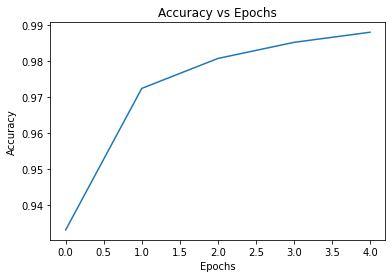

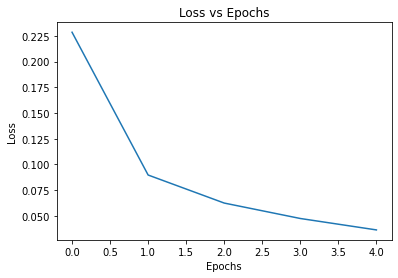

In [8]:
frame = pd.DataFrame(history.history)

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

acc_plot = frame.plot(y="loss", title="Loss vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

## Evaluate model performance against test data

In [9]:
def evaluate_model(model, scaled_test_images, test_labels):
    return model.evaluate(scaled_test_images, test_labels)


test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9813
Test loss: 0.0568549670279026
Test accuracy: 0.9812999963760376


## Model predictions

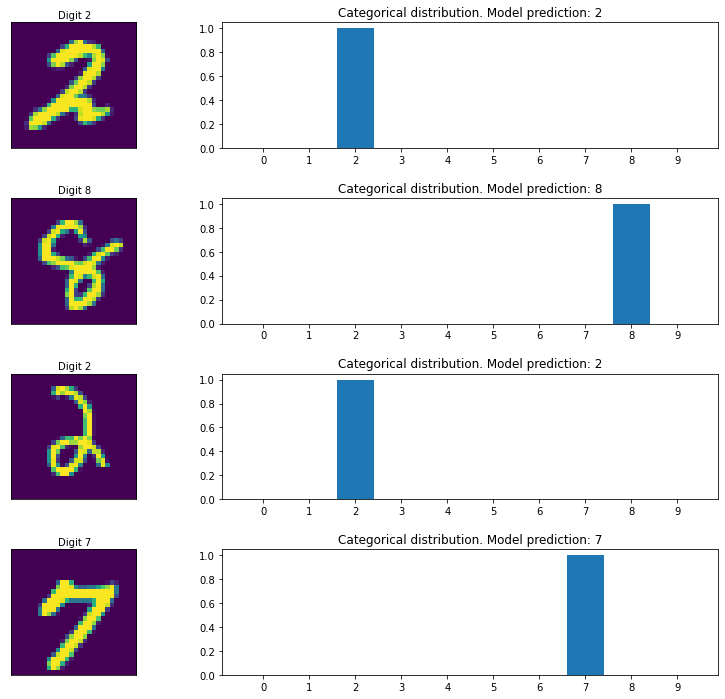

In [10]:
num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")

plt.show()